# Assignment 5 - Risk

This program simulates 1000 individual battle rounds in the game Risk (3 attacker vs 2 defender) and plots the result.

*by Eoghan Walsh*

In [1]:
# Import numpy and matplotlib modules.
'''
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

attack_roll = np.sort(rng.integers(low=1, high=7, size=3))
defend_roll = np.sort(rng.integers(low=1, high=7, size=2))

print(attack_roll, defend_roll)

attacker_losses = 0
defender_losses = 0

if attack_roll[2] > defend_roll[1]:
    print("Defender lost")
    defender_losses += 1
else:
    print("Attacker lost")
    attacker_losses += 1

if attack_roll[1] > defend_roll[0]:
    print("Defender lost")
    defender_losses += 1
else:
    print("Attacker lost")
    attacker_losses += 1

print(f"Attacker losses: {attacker_losses}, Defender losses: {defender_losses}")
'''


'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nrng = np.random.default_rng()\n\nattack_roll = np.sort(rng.integers(low=1, high=7, size=3))\ndefend_roll = np.sort(rng.integers(low=1, high=7, size=2))\n\nprint(attack_roll, defend_roll)\n\nattacker_losses = 0\ndefender_losses = 0\n\nif attack_roll[2] > defend_roll[1]:\n    print("Defender lost")\n    defender_losses += 1\nelse:\n    print("Attacker lost")\n    attacker_losses += 1\n\nif attack_roll[1] > defend_roll[0]:\n    print("Defender lost")\n    defender_losses += 1\nelse:\n    print("Attacker lost")\n    attacker_losses += 1\n\nprint(f"Attacker losses: {attacker_losses}, Defender losses: {defender_losses}")\n'

[[ True  True]
 [False False]
 [ True False]
 [ True  True]
 [ True  True]]
7 3
[2 0 1 2 2] [0 2 1 0 0]
[0 2 2 3 5 7] [0 0 2 3 3 3]
[2 2 3 5 7] [0 2 3 3 3]


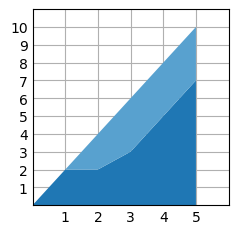

In [110]:
# Import numpy an matplotlib modules.
import numpy as np
import matplotlib.pyplot as plt

# Random number generator.
rng = np.random.default_rng()

# Number of rolls per battle and number of battles.
attack_dice_rolls = 3
defend_dice_rolls = 2
number_of_battles = 5


# Generate numpy arrays for each battle and sort integers in ascending order.
# Ref: https://www.w3schools.com/python/numpy/numpy_array_sort.asp
# Ref: https://realpython.com/numpy-random-number-generator/#random-integer-numbers

attack_roll = np.sort(rng.integers(low=1, high=7, size=(number_of_battles,attack_dice_rolls)))
defend_roll = np.sort(rng.integers(low=1, high=7, size=(number_of_battles,defend_dice_rolls)))

# Slice the array to remove the low number in each attack roll.
attack_roll_top_2 = attack_roll[:number_of_battles,1:]

# The attack roll has to be greater than defend roll to win.
result = attack_roll_top_2 > defend_roll

print(result)

# Total attacker wins
# https://wesmckinney.com/book/numpy-basics#ndarray_statistics
attacker_wins = (result > 0).sum()
defender_wins = ((number_of_battles * 2) - attacker_wins)
print(attacker_wins, defender_wins)

# Sum the attacker wins per battle
total_attacker_wins = np.sum(result, axis=1)

total_defender_wins = ((total_attacker_wins - 2) * -1)

print(total_attacker_wins, total_defender_wins)

# Get a cumulative sum
# https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html#numpy-cumsum
test = np.cumsum(total_attacker_wins)
test2 = np.cumsum(total_defender_wins)

test3 = np.insert(test,0,0)
test4 = np.insert(test2,0,0)
print(test3, test4)

print(test, test2)

fig, ax = plt.subplots()

x = np.arange(0,(number_of_battles + 1), 1)
y = np.vstack([test3, test4])

ax.stackplot(x, y)

ax.set(xlim=(0, number_of_battles + 1), xticks=np.arange(1, number_of_battles + 1),
       ylim=(0, ((number_of_battles * 2) + 1)), yticks=np.arange(1, ((number_of_battles * 2) + 1)))

plt.show()